In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()
#x.shape
print(y.shape)


(50,)


In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [4]:
from costs import*
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    train_idxs = [n for (i, idxs) in enumerate(k_indices) 
                  for n in idxs if i != k]
    
    test_idxs = k_indices[k]
    
    x_train , y_train = x[train_idxs],y[train_idxs]
    x_test , y_test = x[test_idxs],y[test_idxs]
    
    #print('X',x_train.shape)
    #print('Y',y_train.shape)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    x_train = build_poly(x_train,degree)
    x_test = build_poly(x_test,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w,_ = ridge_regression(y_train,x_train,lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = compute_RMSE(y_train,x_train,w)
    loss_te = compute_RMSE(y_test,x_test,w)
    
    return loss_tr, loss_te

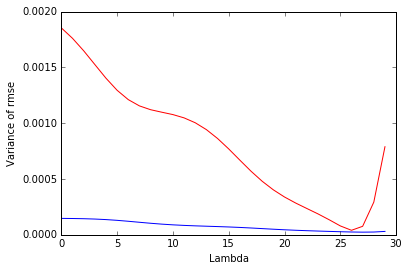

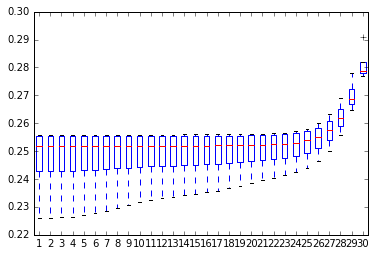

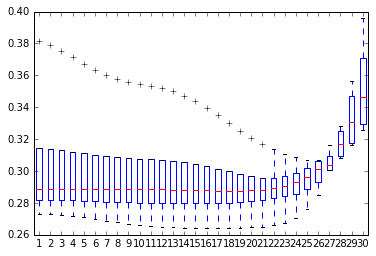

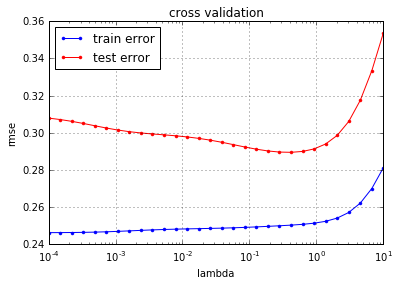

In [5]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 1, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    for l in lambdas:
        M_rmse_tr = []
        M_rmse_te = []
        for k in range(k_fold):
            loss_tr,loss_te = cross_validation(y, x, k_indices, k, l, degree)
            M_rmse_tr.append(loss_tr)
            M_rmse_te.append(loss_te)
        rmse_tr.append(M_rmse_tr)   
        rmse_te.append(M_rmse_te)
        
    
    ##Bonus##
    plt.plot(np.var(rmse_tr,axis=1),c='b')
    plt.plot(np.var(rmse_te,axis=1),c='r')
    plt.xlabel('Lambda')
    plt.ylabel('Variance of rmse')
    plt.show()
    plt.boxplot(rmse_tr)
    plt.show()
    plt.boxplot(rmse_te)
    plt.show()
    #########
    
    
    rmse_tr = np.mean(rmse_tr,axis=1)
    rmse_te = np.mean(rmse_te,axis=1) 
    #rmse_tr = [np.mean(x) for x in rmse_tr]
    #rmse_te = [np.mean(x) for x in rmse_te]        
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    
cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

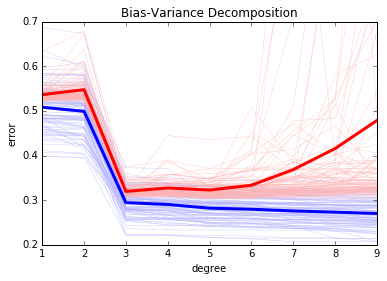

In [11]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        
        
        for index_degree,deg in enumerate(degrees):
            x_train,x_test,y_train,y_test = split_data(x, y, ratio_train, seed)
            x_train = build_poly(x_train,deg)
            x_test = build_poly(x_test,deg)
            w = least_squares(y_train,x_train)
            rmse_tr[index_seed,index_degree] = compute_RMSE(y_train,x_train,w)
            rmse_te[index_seed,index_degree] = compute_RMSE(y_test,x_test,w)

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()